<a href="https://colab.research.google.com/github/devflash101/POC/blob/deep-learning/Deep%20Learning/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generalization: The goal of machine learning


## Underfitting and overfitting


In [ ]:
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import keras
from keras import layers

def get_model():
    model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7812 - loss: 0.7089 - val_accuracy: 0.9189 - val_loss: 0.2715
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9281 - loss: 0.2404 - val_accuracy: 0.9421 - val_loss: 0.1968
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9549 - loss: 0.1565 - val_accuracy: 0.9469 - val_loss: 0.1776
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9682 - loss: 0.1081 - val_accuracy: 0.9519 - val_loss: 0.1540
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9790 - loss: 0.0770 - val_accuracy: 0.9608 - val_loss: 0.1383
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9842 - loss: 0.0534 - val_accuracy: 0.9622 - val_loss: 0.1250
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9906 - loss: 0.0356 - val_accuracy: 0.9622 - val_loss: 0.1271
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9942 - loss: 0.0250 - val_a

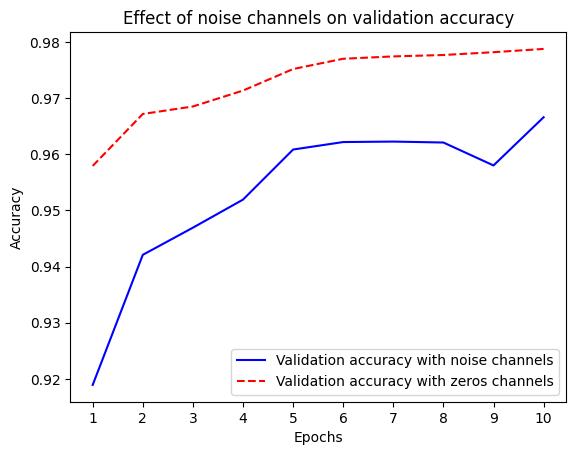

In [ ]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(
    epochs,
    val_acc_noise,
    "b-",
    label="Validation accuracy with noise channels",
)
plt.plot(
    epochs,
    val_acc_zeros,
    "r--",
    label="Validation accuracy with zeros channels",
)
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## The nature of generalization in deep learning


In [ ]:
import keras
from keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Copies train_labels
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_images,
    random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1011 - loss: 2.3349 - val_accuracy: 0.1013 - val_loss: 2.3058
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1169 - loss: 2.2973 - val_accuracy: 0.1013 - val_loss: 2.3112
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1296 - loss: 2.2871 - val_accuracy: 0.1117 - val_loss: 2.3153
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1405 - loss: 2.2748 - val_accuracy: 0.1012 - val_loss: 2.3271
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1564 - loss: 2.2561 - val_accuracy: 0.1032 - val_loss: 2.3351
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1707 - loss: 2.2352 - val_accuracy: 0.0991 - val_loss: 2.3442
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1884 - loss: 2.2073 - val_accuracy: 0.1024 - val_loss: 2.3603
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2096 - loss: 2.1781 - 

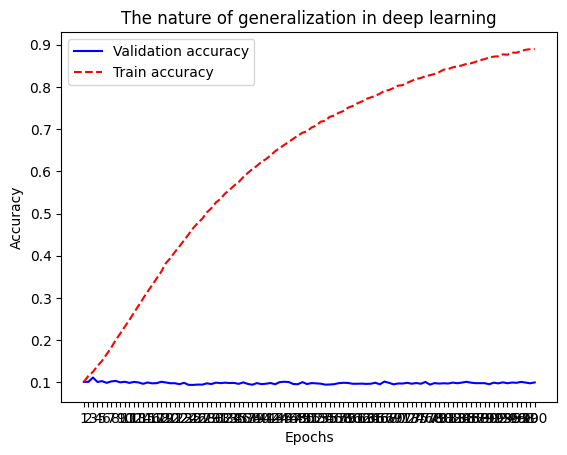

In [ ]:
import matplotlib.pyplot as plt

val_accuracy = history.history["val_accuracy"]
train_accuracy = history.history["accuracy"]
epochs = range(1, 101)
plt.plot(
    epochs,
    val_accuracy,
    "b-",
    label="Validation accuracy",
)
plt.plot(
    epochs,
    train_accuracy,
    "r--",
    label="Train accuracy",
)
plt.title("The nature of generalization in deep learning")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluating machine-learning models


## Training, validation, and test sets


### Simple hold-out validation

In [ ]:
num_validation_samples = 10000
# Shuffling the data is usually appropriate.
np.random.shuffle(data)
# Defines the validation set
validation_data = data[:num_validation_samples]
# Defines the training set
training_data = data[num_validation_samples:]
# Trains a model on the training data and evaluates it on the
# validation data
model = get_model()
model.fit(training_data, ...)
validation_score = model.evaluate(validation_data, ...)

# At this point, you can tune your model, retrain it, evaluate it, tune
# it again, and so on.
...

# Once you've tuned your hyperparameters, it's common to train your
# final model from scratch on all non-test data available.
model = get_model()
model.fit(
    np.concatenate([training_data, validation_data]),
    ...,
)
test_score = model.evaluate(test_data, ...)

### K-fold validation


In [ ]:
k = 3
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
    # Selects the validation-data partition
    validation_data = data[
        num_validation_samples * fold : num_validation_samples * (fold + 1)
    ]
    # Uses the remainder of the data as training data.
    training_data = np.concatenate(
        data[: num_validation_samples * fold],
        data[num_validation_samples * (fold + 1) :],
    )
    # Creates a brand-new instance of the model (untrained)
    model = get_model()
    model.fit(training_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)
# Validation score: average of the validation scores of the k folds
validation_score = np.average(validation_scores)
# Trains the final model on all non-test data available
model = get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data, ...)

### Iterated K-fold validation with shuffling


## Beating a common-sense baseline


## Things to keep in mind about model evaluation


*   Data representativeness
*   The arrow of time
*   Redundancy in your data
